In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


%matplotlib inline

In [3]:
BASE_PATH = '../data/'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'
TRAIN_PATH = BASE_PATH + TRAIN_FILE
TEST_PATH = BASE_PATH + TEST_FILE


In [4]:
train = pd.read_csv(TRAIN_PATH, parse_dates=['Dates'])

In [5]:
test = pd.read_csv(TEST_PATH, parse_dates=['Dates'], index_col='Id')

ValueError: Missing column provided to 'parse_dates': 'Dates'

In [6]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
test.head()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [ ]:
test.info()

In [ ]:
# drop the duplicated records
train.drop_duplicates(inplace=True)
# drop the columns in training set that are not given in test set
train.drop(["Descript", "DayOfWeek", "Resolution"], axis=1, inplace=True)
# drop the redundant columns in testing set
test.drop(["DayOfWeek"], axis=1, inplace=True)

In [8]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
train.info()

### Gaining some insights from the data

#### Crime Category

In [9]:
num_of_cat = train['Category'].nunique()
print(f'number of crime category: {num_of_cat}')

number of crime category: 39


In [10]:
train['Category'].unique()
import pickle
pickle.dump(train['Category'].unique(), open(BASE_PATH+'CatName.pkl','wb'))

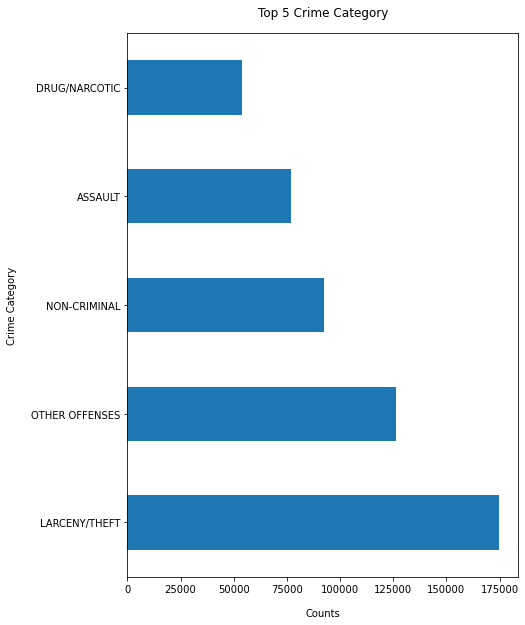

In [11]:
train['Category'].value_counts().nlargest(5).plot(kind='barh', figsize=(7, 10), fontsize=10)
plt.xlabel("Counts", labelpad=14)
plt.ylabel("Crime Category", labelpad=14)
plt.title("Top 5 Crime Category", y=1.02);

<AxesSubplot:xlabel='X', ylabel='Y'>

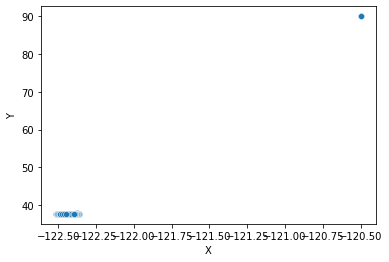

In [12]:
sns.scatterplot(data=train, x="X", y="Y")

## Data Pre-processing

In [13]:
import sys
from os.path import abspath, join, dirname
sys.path.insert(0, join(abspath(dirname('../')), 'libs'))
import preprocessing as pp
import imp

imp.reload(pp)

<module 'preprocessing' from 'C:\\Users\\sinma\\Desktop\\ee4146-group-project\\libs\\preprocessing.py'>

### One hot encoding to the categorical variable (PdDistrict)
#### For both train and test set

In [14]:
train = pp.one_hot_encode(train, ['PdDistrict'])

In [ ]:
train = pp.one_hot_encode(train, ['PdDistrict'])
print("------")
test = pp.one_hot_encode(test, ['PdDistrict'])

In [15]:
train

,Dates,Category,Descript,DayOfWeek,Resolution,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,NONE,600 Block of EDNA ST,-122.447364,37.731948,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
test.head

### Address feature extraction (by https://scottmduda.medium.com/san-francisco-crime-classification-9d5a1c4d7cfd)
The address column only contains two types
* Intersection — OAK ST / LAGUNA ST
* Block — 100 Block of BRODERICK ST

In [16]:
train = pp.process_address(train)
train.head()

,Dates,Category,Descript,DayOfWeek,Resolution,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,"ARREST, BOOKED",0,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",0,-122.425892,37.774599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",0,-122.424363,37.800414,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1,-122.426995,37.800873,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1,-122.438738,37.771541,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
train = pp.process_address(train)
test = pp.process_address(test)
train.head()

### Date features extraction
* HourOfDay
* MinuteOfHour
* DayOfWeek (Weekend, Weekday)
* DayOfMonth
* Year
* MonthOfYear 
* QuarterOfYear (season)
* DayPart (dawn, morning, noon, afternoon, evening, midnight)

In [17]:
train = pp.process_data_time(train)
train.head()

,Category,Descript,DayOfWeek,Resolution,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,...,QuarterOfYear_0,QuarterOfYear_1,QuarterOfYear_2,QuarterOfYear_3,DayPart_afternoon,DayPart_dawn,DayPart_evening,DayPart_midnight,DayPart_morning,DayPart_noon
0,WARRANTS,WARRANT ARREST,Wednesday,"ARREST, BOOKED",0,-122.425892,37.774599,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",0,-122.425892,37.774599,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",0,-122.424363,37.800414,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1,-122.426995,37.800873,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1,-122.438738,37.771541,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train = pp.process_data_time(train)
test = pp.process_data_time(test)
train.head()

### Label encoding to the predictor

In [18]:
train, mappings = pp.label_encode(train, ['Category'])


In [35]:
print(mappings)
print(len(mappings))
mappings[0]
a = mappings.index('DRUG/NARCOTIC')
a

['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']
39


7

In [20]:
pickle.dump(mappings, open(BASE_PATH+'CatName.pkl','wb'))

In [21]:
train.head()

,Category,Descript,DayOfWeek,Resolution,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,...,QuarterOfYear_0,QuarterOfYear_1,QuarterOfYear_2,QuarterOfYear_3,DayPart_afternoon,DayPart_dawn,DayPart_evening,DayPart_midnight,DayPart_morning,DayPart_noon
0,37,WARRANT ARREST,Wednesday,"ARREST, BOOKED",0,-122.425892,37.774599,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,21,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",0,-122.425892,37.774599,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",0,-122.424363,37.800414,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,16,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1,-122.426995,37.800873,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,16,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1,-122.438738,37.771541,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
print(len(train.index))

878049


In [23]:
train.head()

,Category,Descript,DayOfWeek,Resolution,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,...,QuarterOfYear_0,QuarterOfYear_1,QuarterOfYear_2,QuarterOfYear_3,DayPart_afternoon,DayPart_dawn,DayPart_evening,DayPart_midnight,DayPart_morning,DayPart_noon
0,37,WARRANT ARREST,Wednesday,"ARREST, BOOKED",0,-122.425892,37.774599,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,21,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",0,-122.425892,37.774599,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",0,-122.424363,37.800414,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,16,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1,-122.426995,37.800873,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,16,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1,-122.438738,37.771541,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
train.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Resolution', 'Address', 'X', 'Y',
       'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
       'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
       'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL',
       'PdDistrict_TENDERLOIN', 'HourOfDay', 'MinuteOfHour', 'DayOfMonth',
       'Year', 'DayOfWeek_weekDay', 'DayOfWeek_weekend', 'MonthOfYear_autumn',
       'MonthOfYear_spring', 'MonthOfYear_summer', 'MonthOfYear_winter',
       'QuarterOfYear_0', 'QuarterOfYear_1', 'QuarterOfYear_2',
       'QuarterOfYear_3', 'DayPart_afternoon', 'DayPart_dawn',
       'DayPart_evening', 'DayPart_midnight', 'DayPart_morning',
       'DayPart_noon'],
      dtype='object')

In [25]:
test.columns

NameError: name 'test' is not defined

In [26]:
TRAIN_FILE_PRCOESSED = 'train_processed.pkl'


train.to_pickle(BASE_PATH + TRAIN_FILE_PRCOESSED)


In [ ]:
TRAIN_FILE_PRCOESSED = 'train_processed.pkl'
TEST_FILE_PRCOESSED = 'test_processed.pkl'

train.to_pickle(BASE_PATH + TRAIN_FILE_PRCOESSED)
test.to_pickle(BASE_PATH + TEST_FILE_PRCOESSED)

In [27]:
train

,Category,Descript,DayOfWeek,Resolution,Address,X,Y,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,...,QuarterOfYear_0,QuarterOfYear_1,QuarterOfYear_2,QuarterOfYear_3,DayPart_afternoon,DayPart_dawn,DayPart_evening,DayPart_midnight,DayPart_morning,DayPart_noon
0,37,WARRANT ARREST,Wednesday,"ARREST, BOOKED",0,-122.425892,37.774599,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,21,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",0,-122.425892,37.774599,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21,TRAFFIC VIOLATION ARREST,Wednesday,"ARREST, BOOKED",0,-122.424363,37.800414,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,16,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1,-122.426995,37.800873,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,16,GRAND THEFT FROM LOCKED AUTO,Wednesday,NONE,1,-122.438738,37.771541,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,25,ROBBERY ON THE STREET WITH A GUN,Monday,NONE,0,-122.459033,37.714056,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
878045,16,GRAND THEFT FROM LOCKED AUTO,Monday,NONE,1,-122.447364,37.731948,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
878046,16,GRAND THEFT FROM LOCKED AUTO,Monday,NONE,0,-122.403390,37.780266,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
878047,35,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,NONE,0,-122.390531,37.780607,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
test

In [29]:
trainA = train[train.Year == 2015]
trainA
trainA.to_csv(r'C:\Users\sinma\Desktop\ee4146-group-project\data\train2015.csv', index = False, header=True)